In [ ]:

# Importing the important libraries
import tensorflow as tf
from tensorflow import keras
#from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D,Flatten, Activation, Dropout
from keras.models import Model, Sequential
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2

num_classes=45

img_h=32
img_w=32
batch_size=8

train = ImageDataGenerator( rescale=1./255 )
validation = ImageDataGenerator( rescale=1./255)

train_dataset = train.flow_from_directory('/content/gdrive/My Drive/data/MMU/', target_size=(img_h,img_w),
                                          class_mode='categorical',
                                          batch_size=batch_size)

validation_dataset = train.flow_from_directory('/content/gdrive/My Drive/data/MMU2/', target_size=(img_h,img_w),
                                          class_mode='categorical',
                                          batch_size=batch_size)


Found 180 images belonging to 45 classes.
Found 45 images belonging to 45 classes.


In [ ]:
########### Create the model_1 #################

learning_rate = 0.0010
dropout=0.1

model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(img_h,img_w,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64, (5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#model.add(Conv2D(128, (7,7)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=2))


model.add(Flatten())
model.add(Dense(768))
model.add(Dropout(dropout))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])

#model_fit = model.fit_generator(train_dataset, steps_per_epoch=20,
 #                               epochs=250,
  #                              validation_data=validation_dataset)

In [ ]:
model.summary()

In [ ]:
#### Create model_2 ########### 
# It gives more than 80% validation accuracy 



# Importing the important libraries
import tensorflow as tf
from tensorflow import keras
#from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D,Flatten, Activation, Dropout
from keras.models import Model, Sequential
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2

num_classes=224

img_h=32
img_w=32
batch_size=16

train = ImageDataGenerator( rescale=1./255 )
validation = ImageDataGenerator( rescale=1./255)

train_dataset = train.flow_from_directory('/content/gdrive/My Drive/Iris_Data_IITD/Train', target_size=(img_h,img_w),
                                          class_mode='categorical',
                                          batch_size=batch_size)

validation_dataset = train.flow_from_directory('/content/gdrive/My Drive/Iris_Data_IITD/Validation', target_size=(img_h,img_w),
                                          class_mode='categorical',
                                          batch_size=batch_size)


learning_rate = 0.00010
dropout=0.8

model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(img_h,img_w,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64, (5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#model.add(Conv2D(128, (7,7)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=2))


model.add(Flatten())
model.add(Dense(768))
model.add(Dropout(dropout))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])

model_fit = model.fit_generator(train_dataset, steps_per_epoch=20,
                                epochs=1000,
                                validation_data=validation_dataset)

In [ ]:
model.save_weights('iris_model_2.h5')

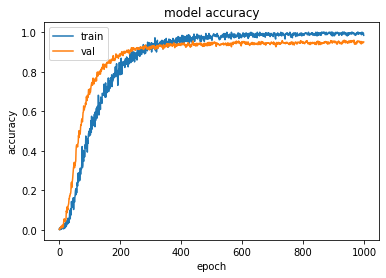

In [ ]:
from matplotlib import pyplot as plt
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

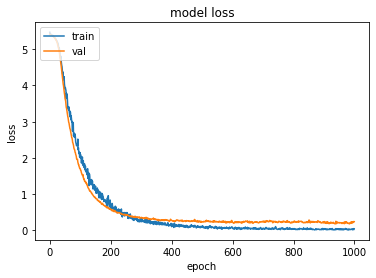

In [ ]:
from matplotlib import pyplot as plt
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
im=cv2.imread('10_L.bmp')
img=cv2.resize(im,(32,32))
img=np.expand_dims(img,axis=0)
pred=model.predict(img)
predicted_class_indices = np.argmax(pred, axis=1)
print(predicted_class_indices)

Instructions for updating:
Please use Model.predict, which supports generators.


array([98])